In [1]:
using GLMakie
GLMakie.activate!()
GLMakie.closeall() # close any open screen

In [2]:
function peaks(; n = 49)
    x = LinRange(-3, 3, n)
    y = LinRange(-3, 3, n)
    a = 3 * (1 .- x').^2 .* exp.(-(x'.^2) .- (y .+ 1).^2)
    b = 10 * (x' / 5 .- x'.^3 .- y.^5) .* exp.(-x'.^2 .- y.^2)
    c = 1 / 3 * exp.(-(x' .+ 1).^2 .- y.^2)
    return (x, y, a .- b .- c)
end

peaks (generic function with 1 method)

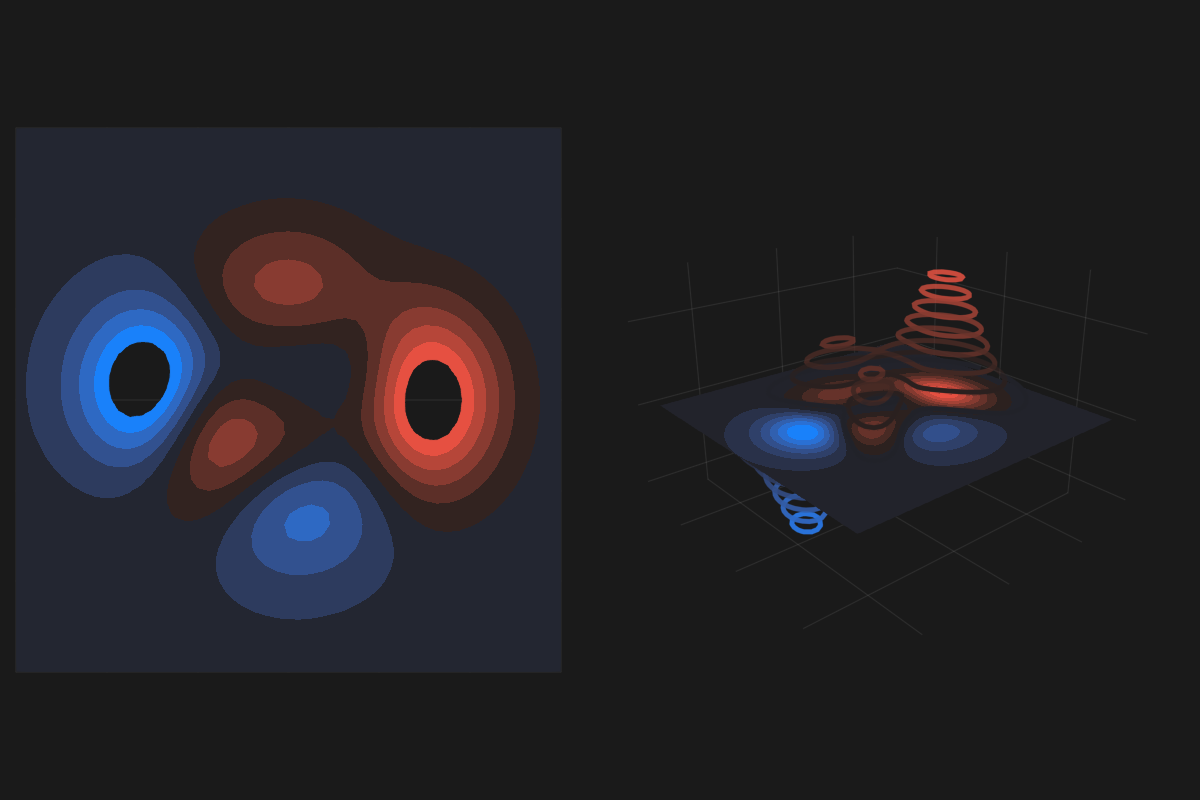

In [3]:
x, y, z = peaks()
with_theme(theme_dark()) do
    fig = Figure(size = (1200,800))
    ax1 = Axis(fig[1,1], aspect = 1)
    ax2 = Axis3(fig[1,2]; aspect = (1,1,0.7), perspectiveness = 0.5)
    axs = [ax1, ax2]
    cmap =  :diverging_bkr_55_10_c35_n256
    contourf!(axs[1], x, y, z; levels = 0.1:0.08:0.9, mode = :relative,
        colormap = cmap)
    # bug, colormap cannot be transparent
    contourf!(axs[2], x, y, z; levels = 14, colormap = cmap)
    contour3d!(axs[2], x, y, z; levels = 14, colormap = cmap,
        transparency = true, linewidth = 5)
    limits!(axs[1], -3,3,-3,3)
    hidedecorations!.(axs; grid = false)
    fig
end